In [58]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
import pandas as pd
%matplotlib inline
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import warnings
warnings.filterwarnings('ignore')

In [59]:
#power_data_west = pd.read_csv("west_interval_data_01-29-2019_01-27-2021.csv")
power_data_west = pd.read_csv("westdata_augmented.csv")

In [60]:
power_data_west.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,sfm,index_y,dt,dt_iso,humidity,humidity_temp,pt_date
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,2019-01-29 00,680,1548748800,2019-01-29 08,21,63.86,2019-01-29 00
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,2019-01-29 01,681,1548752400,2019-01-29 09,21,63.41,2019-01-29 01
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,2019-01-29 02,682,1548756000,2019-01-29 10,22,62.98,2019-01-29 02


In [61]:
power_data_west['end'] = pd.to_datetime(power_data_west['end'], infer_datetime_format=True)
indexedDataset = power_data_west.set_index(['end'])

In [62]:
plot_df_west = pd.DataFrame(power_data_west, columns=['demand', 'temp', 'end', 'humidity'])

In [63]:
plot_df_west['end'].min()

Timestamp('2019-01-29 00:15:00')

In [64]:
plot_df_west['end'].max()

Timestamp('2022-01-25 16:00:00')

In [65]:
power_data_west['month'] = power_data_west['end'].dt.strftime('%b')

In [66]:
from calendar import month_abbr

lower_ma = [m.lower() for m in month_abbr]

# one-liner with Pandas
power_data_west['month_int'] = power_data_west['month'].str.lower().map(lambda m: lower_ma.index(m)).astype('Int8')

In [67]:
power_data_west['day_of_week'] = power_data_west['end'].dt.day_name()

In [68]:
power_data_west['day_of_week_int'] = power_data_west['end'].dt.day_of_week

In [69]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

date_range = pd.date_range(start='2019-01-01', end='2022-01-27')

cal = calendar()
holidays = cal.holidays(start=date_range.min(), end=date_range.max())

power_data_west['holiday'] = power_data_west['end'].dt.date.astype('datetime64').isin(holidays)

In [70]:
power_data_west.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,...,1548748800,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,...,1548752400,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,...,1548756000,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,1,False
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,...,1548756000,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,1,False


In [71]:
power_data_west.tail(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday
104598,104598,104598,west,2022-01-25 13:30:00,2022-01-25 13:45:00,301.6,NaN,66.0,NaN,1206.4,...,1643144400,2022-01-25 21,37,68.23,2022-01-25 13,Jan,1,Tuesday,1,False
104599,104599,104599,west,2022-01-25 13:45:00,2022-01-25 14:00:00,300.0,NaN,66.0,NaN,1200.0,...,1643144400,2022-01-25 21,37,68.23,2022-01-25 13,Jan,1,Tuesday,1,False
104600,104600,104600,west,2022-01-25 14:00:00,2022-01-25 14:15:00,300.8,NaN,67.0,NaN,1203.2,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,1,False
104601,104601,104601,west,2022-01-25 14:15:00,2022-01-25 14:30:00,309.6,NaN,67.0,NaN,1238.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,1,False
104602,104602,104602,west,2022-01-25 14:30:00,2022-01-25 14:45:00,297.6,NaN,67.0,NaN,1190.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,1,False
104603,104603,104603,west,2022-01-25 14:45:00,2022-01-25 15:00:00,297.6,NaN,67.0,NaN,1190.4,...,1643148000,2022-01-25 22,27,69.22,2022-01-25 14,Jan,1,Tuesday,1,False
104604,104604,104604,west,2022-01-25 15:00:00,2022-01-25 15:15:00,295.2,NaN,67.0,NaN,1180.8,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,1,False
104605,104605,104605,west,2022-01-25 15:15:00,2022-01-25 15:30:00,304.8,NaN,67.0,NaN,1219.2,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,1,False
104606,104606,104606,west,2022-01-25 15:30:00,2022-01-25 15:45:00,309.6,NaN,67.0,NaN,1238.4,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,1,False
104607,104607,104607,west,2022-01-25 15:45:00,2022-01-25 16:00:00,296.8,NaN,67.0,NaN,1187.2,...,1643151600,2022-01-25 23,26,68.34,2022-01-25 15,Jan,1,Tuesday,1,False


In [72]:
power_data_west.describe()

,Unnamed: 0,index_x,usage,cost,temp,demand,index_y,dt,humidity,humidity_temp,month_int,day_of_week_int
count,104608.000000,104608.000000,104596.000000,0.0,104588.00000,104596.000000,104608.000000,1.046080e+05,104608.000000,104608.000000,104608.00000,104608.000000
mean,52303.500000,52303.500000,309.658615,NaN,67.39232,1238.634456,13764.530284,1.595853e+09,52.635401,68.527903,6.54298,2.998748
std,30197.872817,30197.872817,75.599852,NaN,16.59371,302.399419,7560.847033,2.721905e+07,22.815913,15.741494,3.43464,2.002753
min,0.000000,0.000000,0.000000,NaN,29.00000,0.000000,680.000000,1.548749e+09,3.000000,32.200000,1.00000,0.000000
25%,26151.750000,26151.750000,252.000000,NaN,54.00000,1008.000000,7217.750000,1.572285e+09,34.000000,55.850000,4.00000,1.000000
50%,52303.500000,52303.500000,308.000000,NaN,66.00000,1232.000000,13755.500000,1.595821e+09,49.000000,66.900000,7.00000,3.000000
75%,78455.250000,78455.250000,368.000000,NaN,79.00000,1472.000000,20317.250000,1.619443e+09,70.000000,80.550000,10.00000,5.000000
max,104607.000000,104607.000000,531.200000,NaN,114.00000,2124.800000,26903.000000,1.643152e+09,100.000000,110.680000,12.00000,6.000000


In [73]:
power_data_west.shape

(104608, 22)

In [74]:
power_data_west.dtypes

Unnamed: 0                  int64
index_x                     int64
service                    object
start                      object
end                datetime64[ns]
usage                     float64
cost                      float64
temp                      float64
event_flag                 object
demand                    float64
sfm                        object
index_y                     int64
dt                          int64
dt_iso                     object
humidity                    int64
humidity_temp             float64
pt_date                    object
month                      object
month_int                    Int8
day_of_week                object
day_of_week_int             int64
holiday                      bool
dtype: object

In [75]:
#For checking missing values in dataset
power_data_west.isna().sum()

Unnamed: 0              0
index_x                 0
service                 0
start                   0
end                     0
usage                  12
cost               104608
temp                   20
event_flag         104602
demand                 12
sfm                     0
index_y                 0
dt                      0
dt_iso                  0
humidity                0
humidity_temp           0
pt_date                 0
month                   0
month_int               0
day_of_week             0
day_of_week_int         0
holiday                 0
dtype: int64

In [76]:
power_data_west.fillna(method='ffill',inplace=True)
power_data_west.isna().sum()

Unnamed: 0              0
index_x                 0
service                 0
start                   0
end                     0
usage                   0
cost               104608
temp                    0
event_flag           3840
demand                  0
sfm                     0
index_y                 0
dt                      0
dt_iso                  0
humidity                0
humidity_temp           0
pt_date                 0
month                   0
month_int               0
day_of_week             0
day_of_week_int         0
holiday                 0
dtype: int64

In [77]:
zero_usage_df = power_data_west.loc[power_data_west['demand'] == 0]
zero_usage_df.count()

Unnamed: 0         50
index_x            50
service            50
start              50
end                50
usage              50
cost                0
temp               50
event_flag         50
demand             50
sfm                50
index_y            50
dt                 50
dt_iso             50
humidity           50
humidity_temp      50
pt_date            50
month              50
month_int          50
day_of_week        50
day_of_week_int    50
holiday            50
dtype: int64

In [78]:
power_data_west = power_data_west[power_data_west['demand'] != 0]
zero_usage_df = power_data_west.loc[power_data_west['demand'] == 0]
zero_usage_df.count()

Unnamed: 0         0
index_x            0
service            0
start              0
end                0
usage              0
cost               0
temp               0
event_flag         0
demand             0
sfm                0
index_y            0
dt                 0
dt_iso             0
humidity           0
humidity_temp      0
pt_date            0
month              0
month_int          0
day_of_week        0
day_of_week_int    0
holiday            0
dtype: int64

## Linear Demand

In [79]:
linear_data = power_data_west[(power_data_west['end'] > '2019-01-01') & (power_data_west['end'] < '2022-02-01')]

In [80]:
linear_data["holiday_int"] = linear_data["holiday"].astype(int)

In [81]:
linear_data.head(10)

,Unnamed: 0,index_x,service,start,end,usage,cost,temp,event_flag,demand,...,dt_iso,humidity,humidity_temp,pt_date,month,month_int,day_of_week,day_of_week_int,holiday,holiday_int
0,0,0,west,2019-01-29 00:00:00,2019-01-29 00:15:00,211.2,NaN,54.0,NaN,844.8,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False,0
1,1,1,west,2019-01-29 00:15:00,2019-01-29 00:30:00,210.4,NaN,54.0,NaN,841.6,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False,0
2,2,2,west,2019-01-29 00:30:00,2019-01-29 00:45:00,208.0,NaN,54.0,NaN,832.0,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False,0
3,3,3,west,2019-01-29 00:45:00,2019-01-29 01:00:00,212.0,NaN,54.0,NaN,848.0,...,2019-01-29 08,21,63.86,2019-01-29 00,Jan,1,Tuesday,1,False,0
4,4,4,west,2019-01-29 01:00:00,2019-01-29 01:15:00,203.2,NaN,55.0,NaN,812.8,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False,0
5,5,5,west,2019-01-29 01:15:00,2019-01-29 01:30:00,205.6,NaN,55.0,NaN,822.4,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False,0
6,6,6,west,2019-01-29 01:30:00,2019-01-29 01:45:00,205.6,NaN,55.0,NaN,822.4,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False,0
7,7,7,west,2019-01-29 01:45:00,2019-01-29 02:00:00,208.8,NaN,55.0,NaN,835.2,...,2019-01-29 09,21,63.41,2019-01-29 01,Jan,1,Tuesday,1,False,0
8,8,8,west,2019-01-29 02:00:00,2019-01-29 02:15:00,217.6,NaN,55.0,NaN,870.4,...,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,1,False,0
9,9,9,west,2019-01-29 02:15:00,2019-01-29 02:30:00,229.6,NaN,55.0,NaN,918.4,...,2019-01-29 10,22,62.98,2019-01-29 02,Jan,1,Tuesday,1,False,0


<AxesSubplot:>

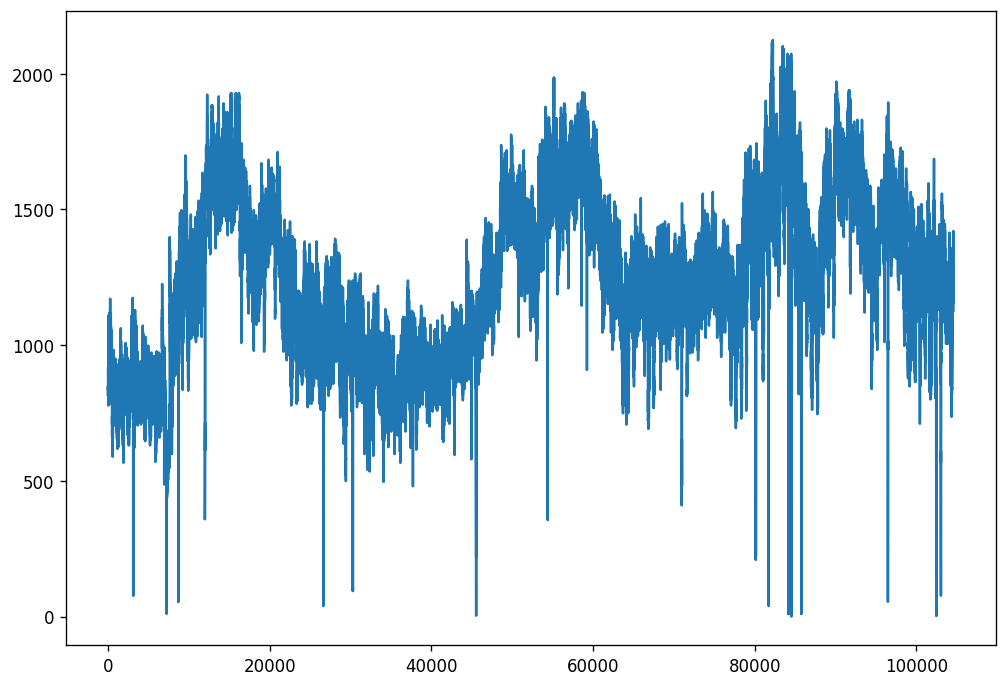

In [82]:
linear_data['demand'].plot()

<AxesSubplot:>

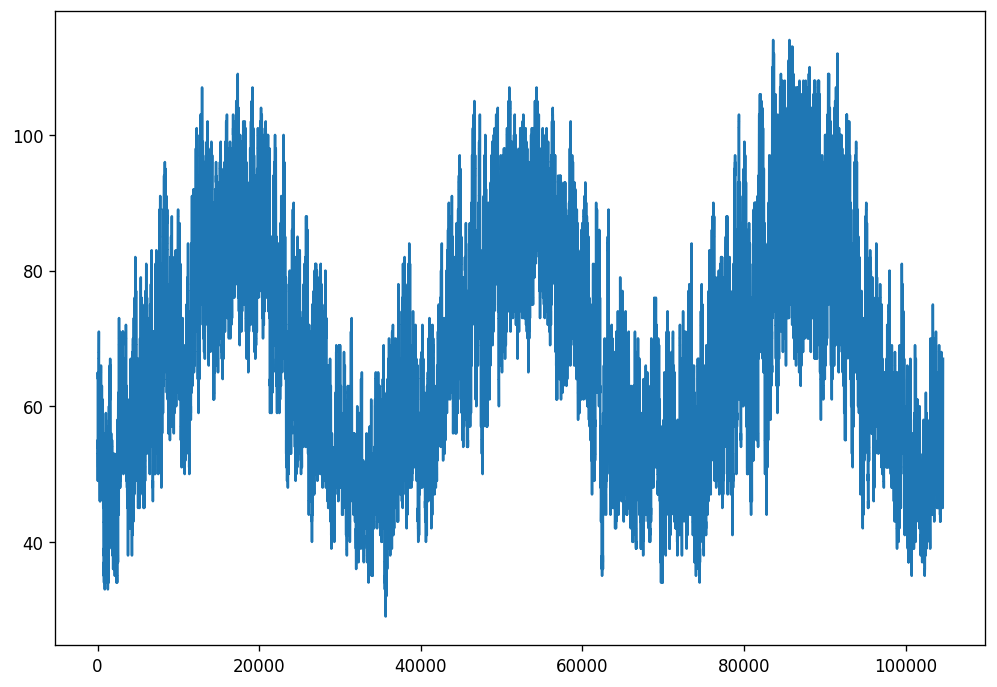

In [83]:
linear_data['temp'].plot()

<AxesSubplot:>

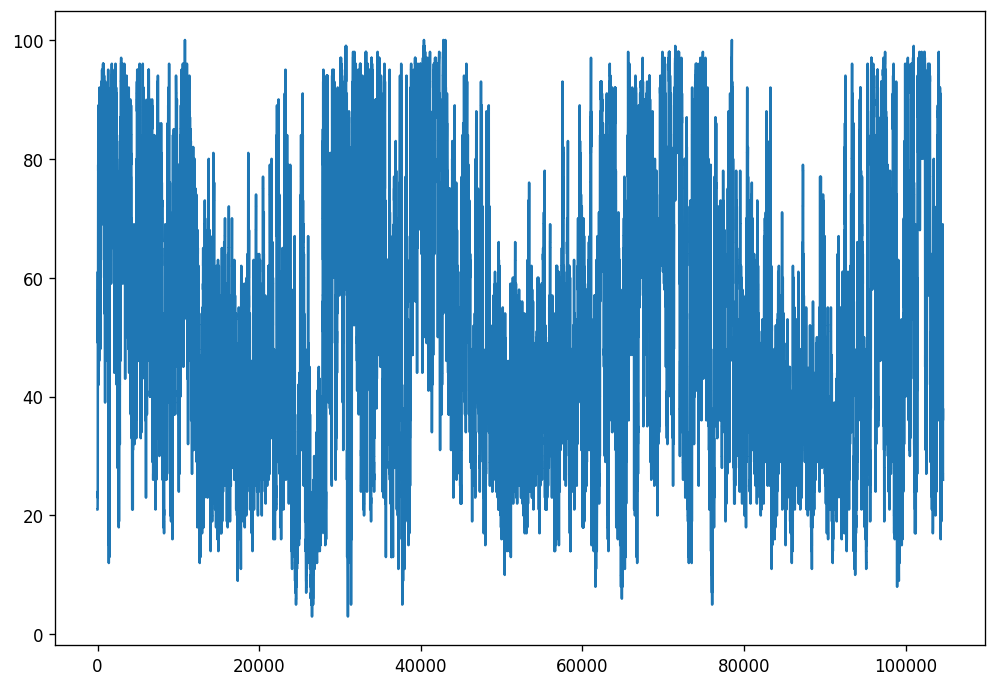

In [84]:
linear_data['humidity'].plot()

In [85]:
linear_data_mod = linear_data[['demand', 'temp', 'humidity', 'month_int', 'day_of_week_int', 'holiday_int']].copy() 

In [86]:
linear_data_mod.head(10)

,demand,temp,humidity,month_int,day_of_week_int,holiday_int
0,844.8,54.0,21,1,1,0
1,841.6,54.0,21,1,1,0
2,832.0,54.0,21,1,1,0
3,848.0,54.0,21,1,1,0
4,812.8,55.0,21,1,1,0
5,822.4,55.0,21,1,1,0
6,822.4,55.0,21,1,1,0
7,835.2,55.0,21,1,1,0
8,870.4,55.0,22,1,1,0
9,918.4,55.0,22,1,1,0


In [87]:
for i in range(1, 97):
    linear_data_mod["demand_lag_{}".format(i)] = linear_data_mod['demand'].shift(i)
    linear_data_mod["temp_lag_{}".format(i)] = linear_data_mod['temp'].shift(i)
    linear_data_mod["humidity_lag_{}".format(i)] = linear_data_mod['humidity'].shift(i)

In [88]:
linear_data_mod.head(10)

,demand,temp,humidity,month_int,day_of_week_int,holiday_int,demand_lag_1,temp_lag_1,humidity_lag_1,demand_lag_2,...,humidity_lag_93,demand_lag_94,temp_lag_94,humidity_lag_94,demand_lag_95,temp_lag_95,humidity_lag_95,demand_lag_96,temp_lag_96,humidity_lag_96
0,844.8,54.0,21,1,1,0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,841.6,54.0,21,1,1,0,844.8,54.0,21.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,832.0,54.0,21,1,1,0,841.6,54.0,21.0,844.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,848.0,54.0,21,1,1,0,832.0,54.0,21.0,841.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,812.8,55.0,21,1,1,0,848.0,54.0,21.0,832.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,822.4,55.0,21,1,1,0,812.8,55.0,21.0,848.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,822.4,55.0,21,1,1,0,822.4,55.0,21.0,812.8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,835.2,55.0,21,1,1,0,822.4,55.0,21.0,822.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,870.4,55.0,22,1,1,0,835.2,55.0,21.0,822.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,918.4,55.0,22,1,1,0,870.4,55.0,22.0,835.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [89]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [90]:
def timeseries_train_test_split(X, y, test_size):
    
    # get the index after which test set starts
    test_index = int(len(X)*(1-test_size))
    
    X_train = X.iloc[:test_index]
    y_train = y.iloc[:test_index]
    X_test = X.iloc[test_index:]
    y_test = y.iloc[test_index:]
    
    return X_train, X_test, y_train, y_test

In [91]:
y = linear_data_mod.dropna()['demand']
X = linear_data_mod.dropna().drop(['demand', 'temp', 'humidity'], axis=1)

In [92]:
X_train, X_test, y_train, y_test = timeseries_train_test_split(X, y, test_size=0.3)

In [93]:
X_train.shape

(73123, 291)

In [94]:
y_train.shape

(73123,)

In [95]:
X_test.shape

(31339, 291)

In [96]:
y_test.shape

(31339,)

In [97]:
lr = LinearRegression(fit_intercept=True)
lr.fit(X_train, y_train)

LinearRegression()

In [98]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

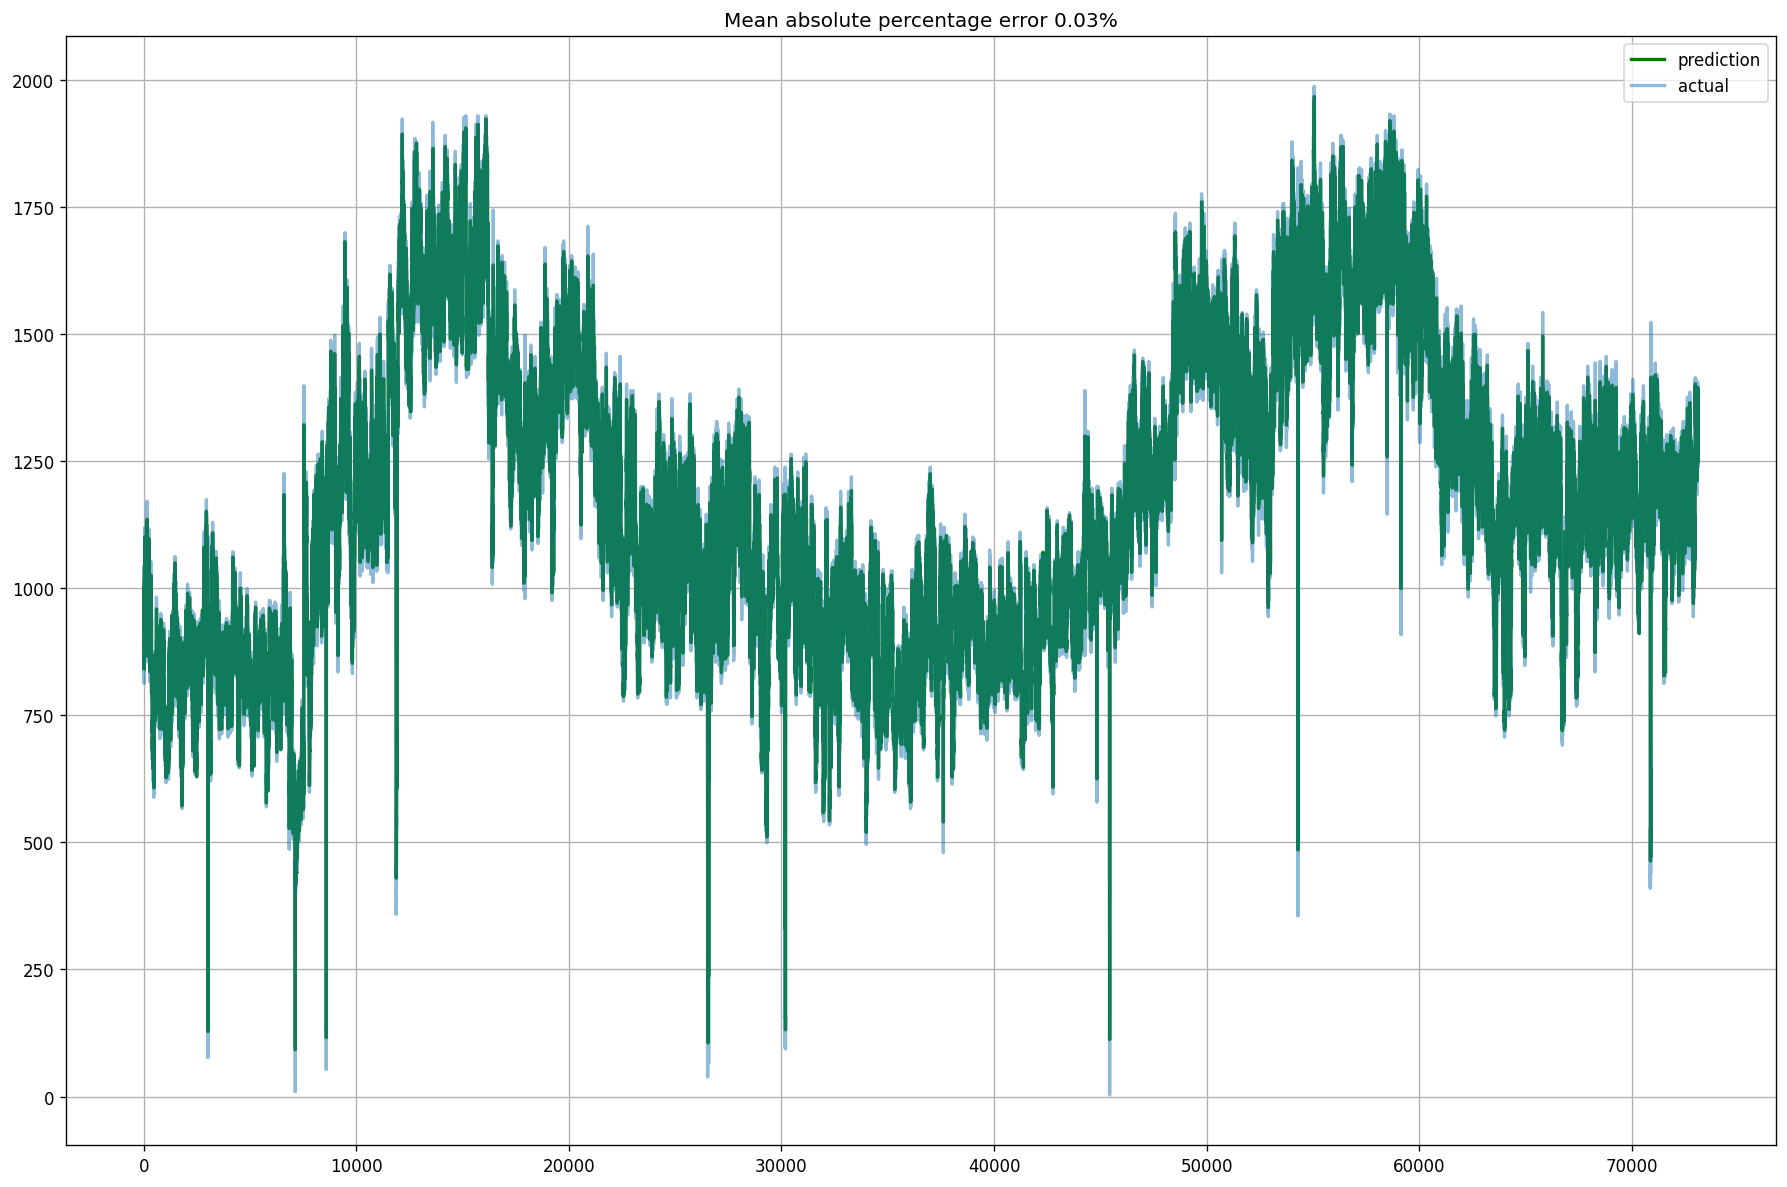

In [99]:
def plotModelTrainingResults(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_train)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_train.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(y_train, prediction)
    mae_error_var = mean_absolute_error(y_train, prediction)
    mse_error_var = mean_squared_error(y_train, prediction, squared=True)
    rmse_error_var = mean_squared_error(y_train, prediction, squared=False)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mape_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_train, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
train_results, train_mape_error_var, train_mae_error_var, train_mse_error_var, train_rmse_error_var = plotModelTrainingResults(lr)

In [100]:
train_results['residual'] = train_results['Actual'] - train_results['Prediction']

In [101]:
train_results.tail(10)

,Actual,Prediction,residual
73225,1267.2,1360.576063,-93.376063
73226,1350.4,1289.376932,61.023068
73227,1305.6,1344.940341,-39.340341
73228,1286.4,1304.158159,-17.758159
73229,1324.8,1299.550171,25.249829
73230,1318.4,1318.591736,-0.191736
73231,1238.4,1306.366346,-67.966346
73232,1273.6,1247.830338,25.769662
73233,1321.6,1275.097692,46.502308
73234,1308.8,1307.316589,1.483411


<AxesSubplot:>

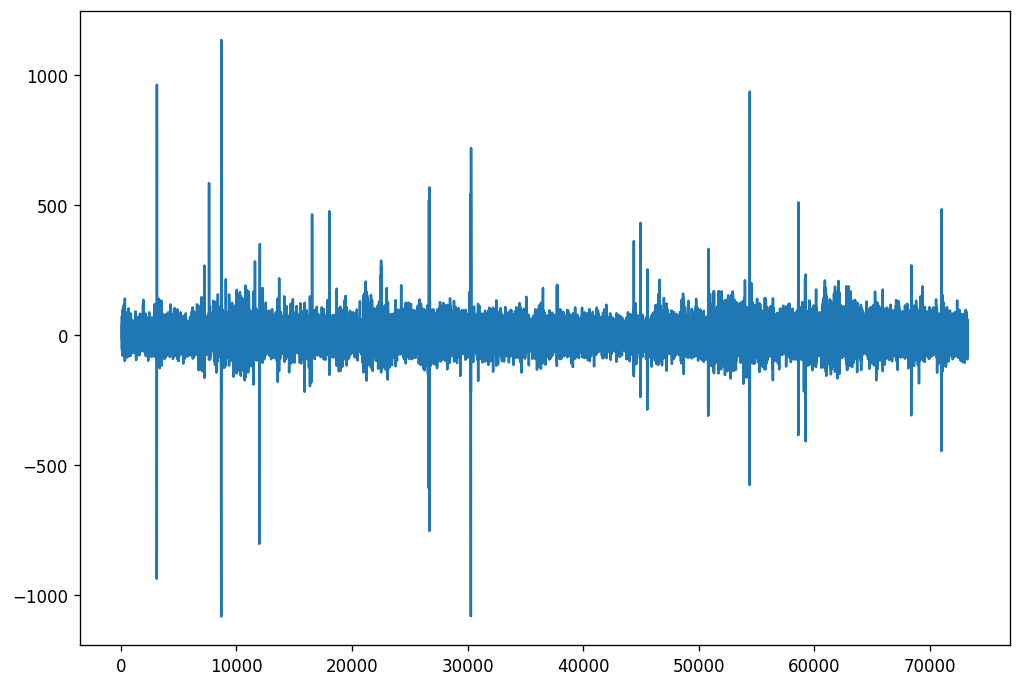

In [102]:
train_results['residual'].plot()

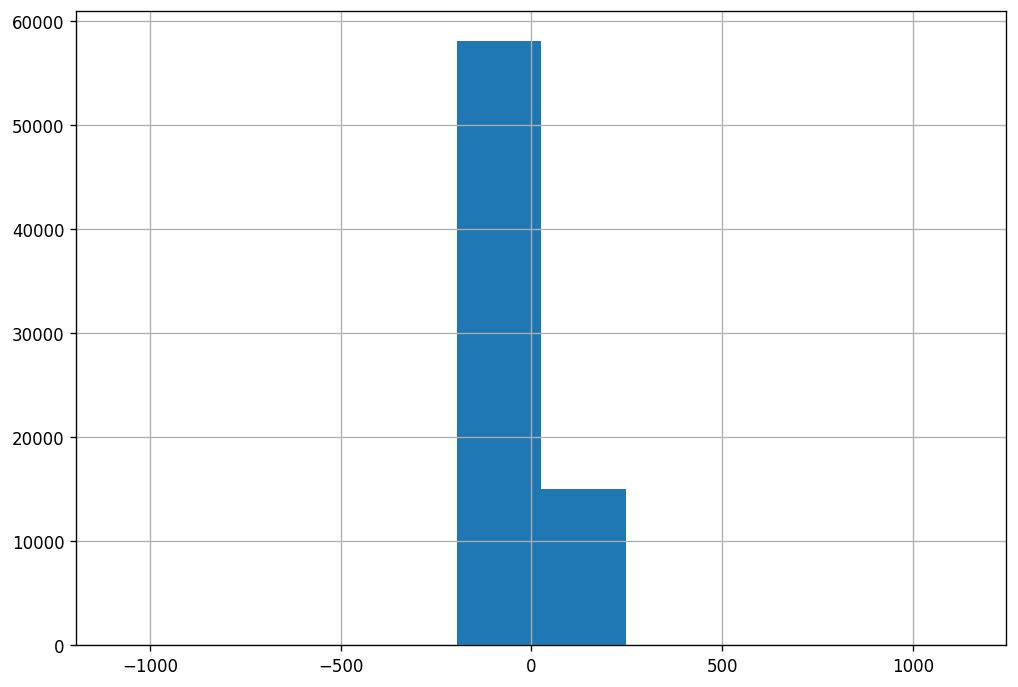

In [103]:
train_results['residual'].hist()
plt.show()

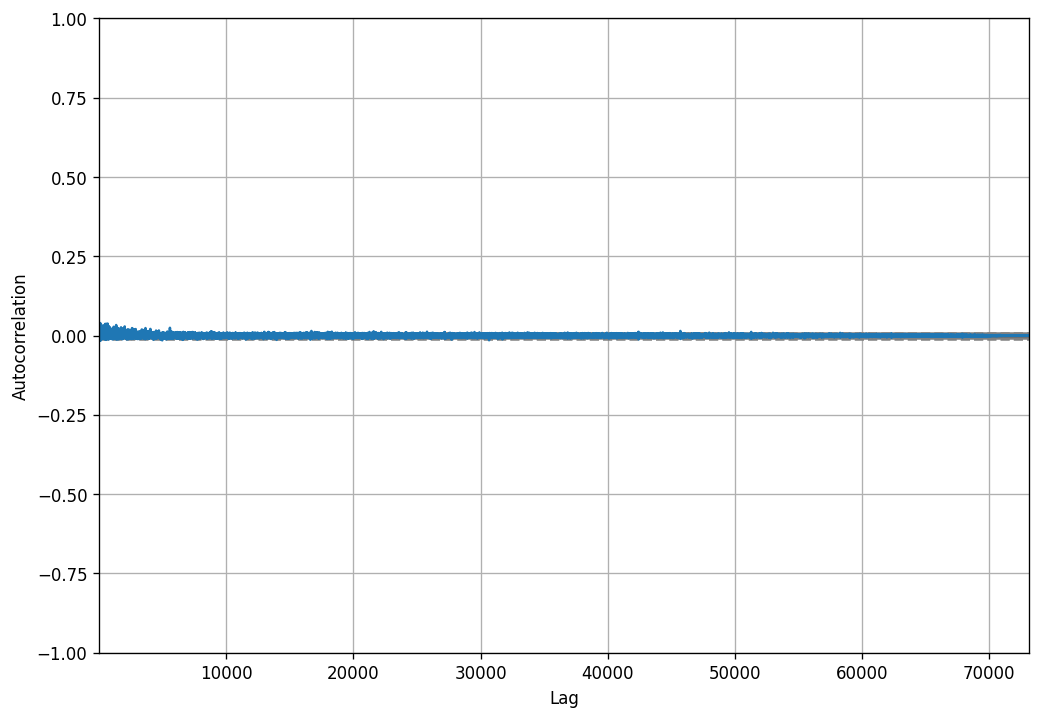

In [104]:
# autocorrelation
autocorrelation_plot(train_results['residual'])
plt.show()

In [105]:
print('MAPE: ' , train_mape_error_var)
print('MAE: ', train_mae_error_var)
print('MSE: ', train_mse_error_var)
print('RMSE: ', train_rmse_error_var)

MAPE:  0.02708690408237933
MAE:  27.222747944027418
MSE:  1487.644994636096
RMSE:  38.57000122680962


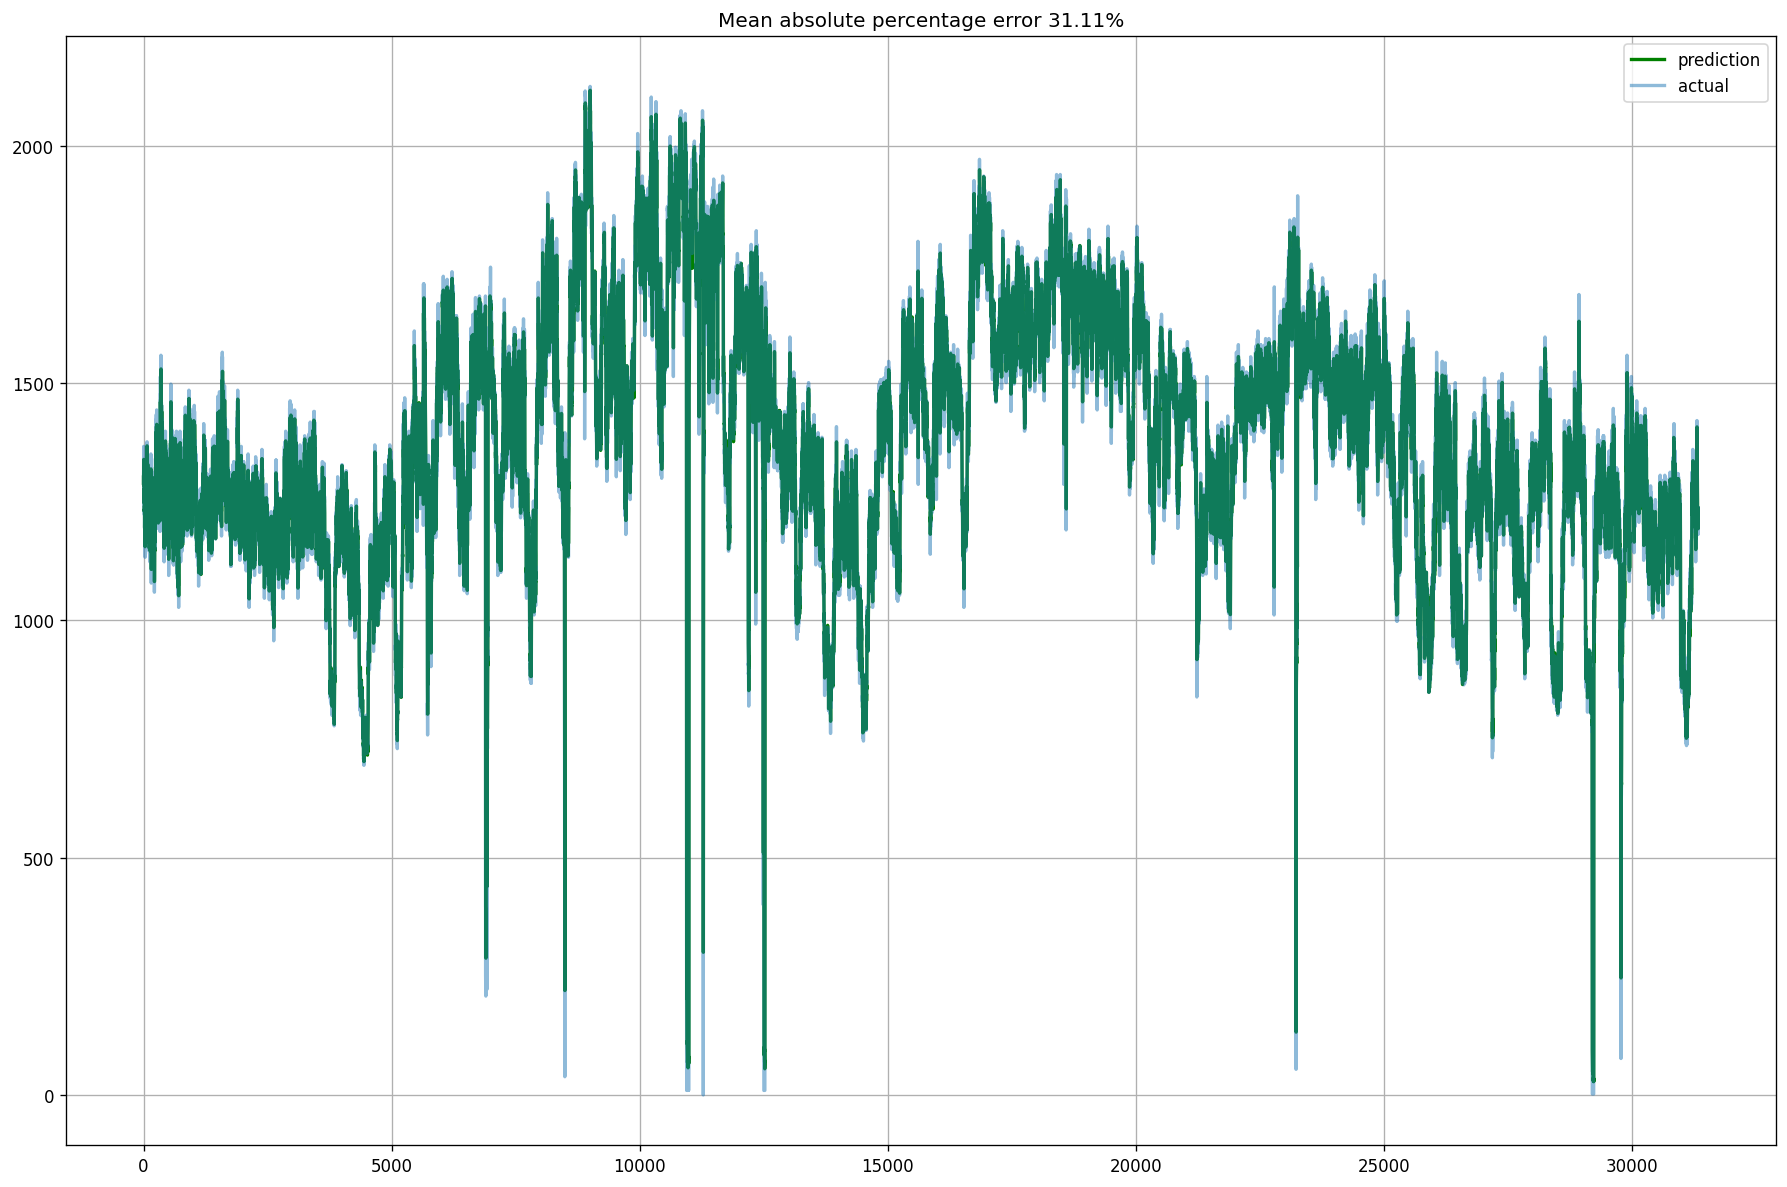

In [106]:
def plotModelPredictions(model, X_train=X_train, X_test=X_test):
  
    prediction = model.predict(X_test)
    
    plt.figure(figsize=(15, 10))
    plt.plot(prediction, "g", label="prediction", linewidth=2.0)
    plt.plot(y_test.values, label="actual", linewidth=2.0, alpha=0.5)

    mape_error_var = mean_absolute_percentage_error(y_test,prediction)
    mae_error_var = mean_absolute_error(y_test,prediction)
    mse_error_var = mean_squared_error(y_test,prediction, squared=True)
    rmse_error_var = mean_squared_error(y_test,prediction, squared=False)
    
    plt.title("Mean absolute percentage error {0:.2f}%".format(mae_error_var))
    plt.legend(loc="best")
    plt.tight_layout()
    plt.grid(True);
    
    results = pd.DataFrame({'Actual':y_test, 
                            'Prediction':prediction  
                           })
    
    return results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var
    
results, mape_error_var, mae_error_var, mse_error_var, rmse_error_var = plotModelPredictions(lr)

In [107]:
results['residual'] = results['Actual'] - results['Prediction']

In [108]:
results.tail(10)

,Actual,Prediction,residual
104598,1206.4,1220.283024,-13.883024
104599,1200.0,1202.229154,-2.229154
104600,1203.2,1215.885420,-12.685420
104601,1238.4,1209.677399,28.722601
104602,1190.4,1237.930491,-47.530491
104603,1190.4,1196.727369,-6.327369
104604,1180.8,1202.870322,-22.070322
104605,1219.2,1192.971522,26.228478
104606,1238.4,1217.701970,20.698030
104607,1187.2,1229.773417,-42.573417


<AxesSubplot:>

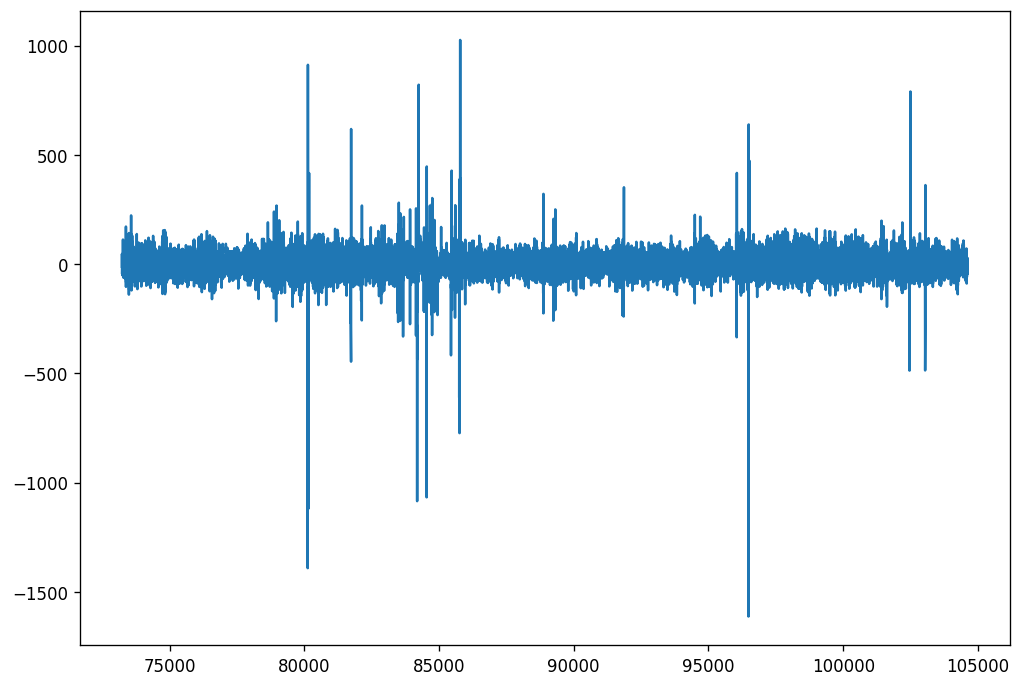

In [109]:
results['residual'].plot()

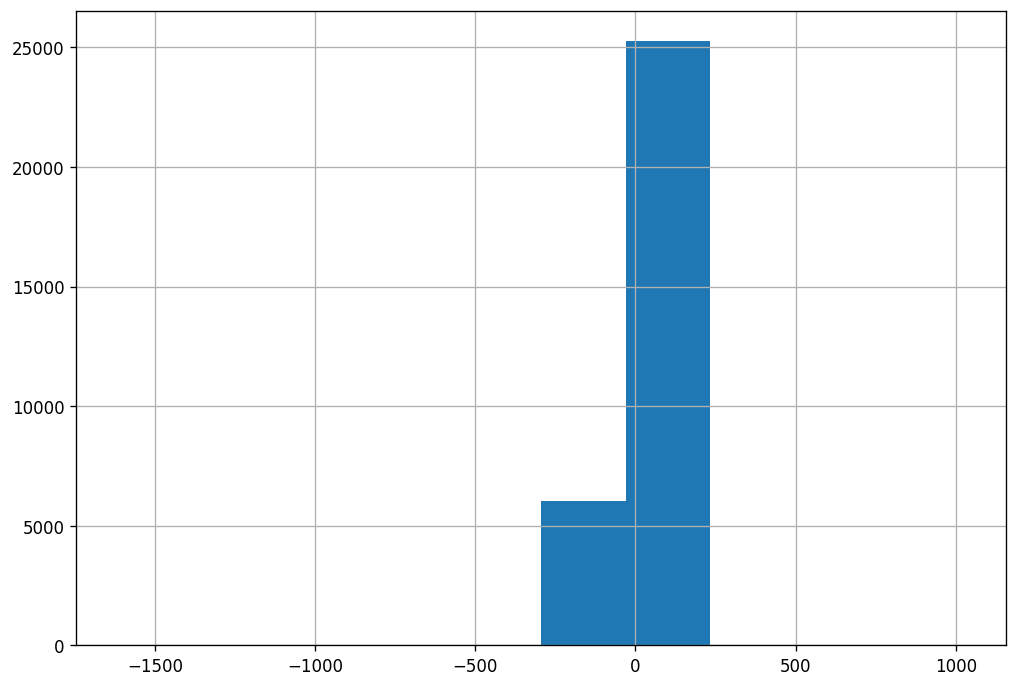

In [110]:
results['residual'].hist()
plt.show()

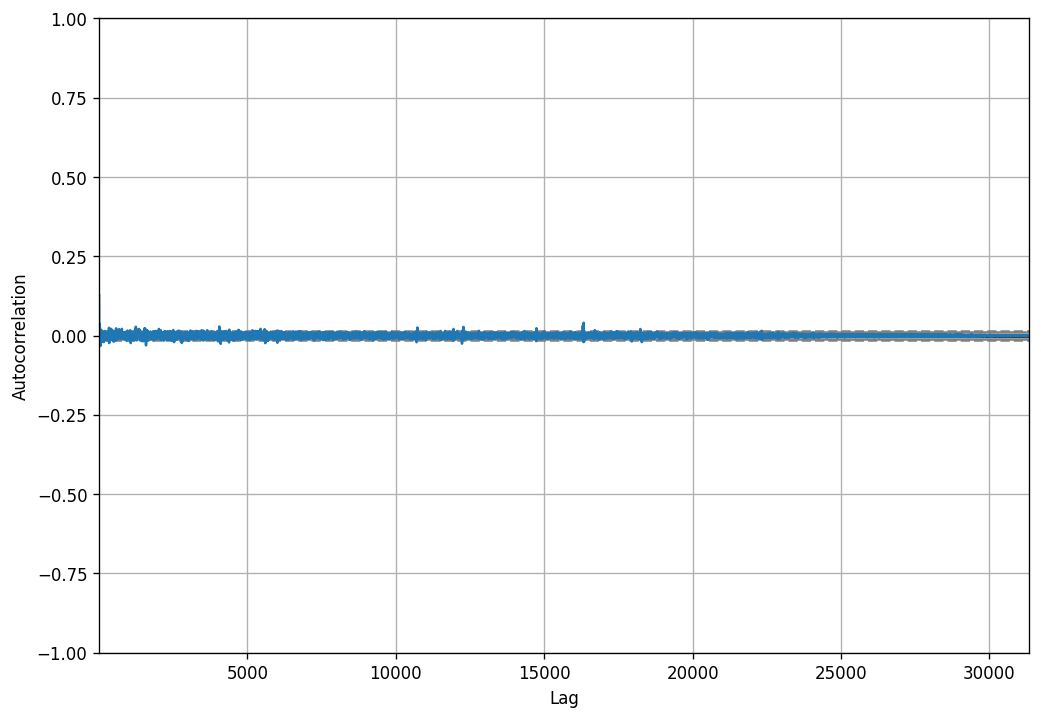

In [111]:
autocorrelation_plot(results['residual'])
plt.show()

In [112]:
print('MAPE: ' , mape_error_var)
print('MAE: ', mae_error_var)
print('MSE: ', mse_error_var)
print('RMSE: ', rmse_error_var)

MAPE:  1.640541095324025
MAE:  31.11356672670964
MSE:  2317.6560859656
RMSE:  48.142040733288404


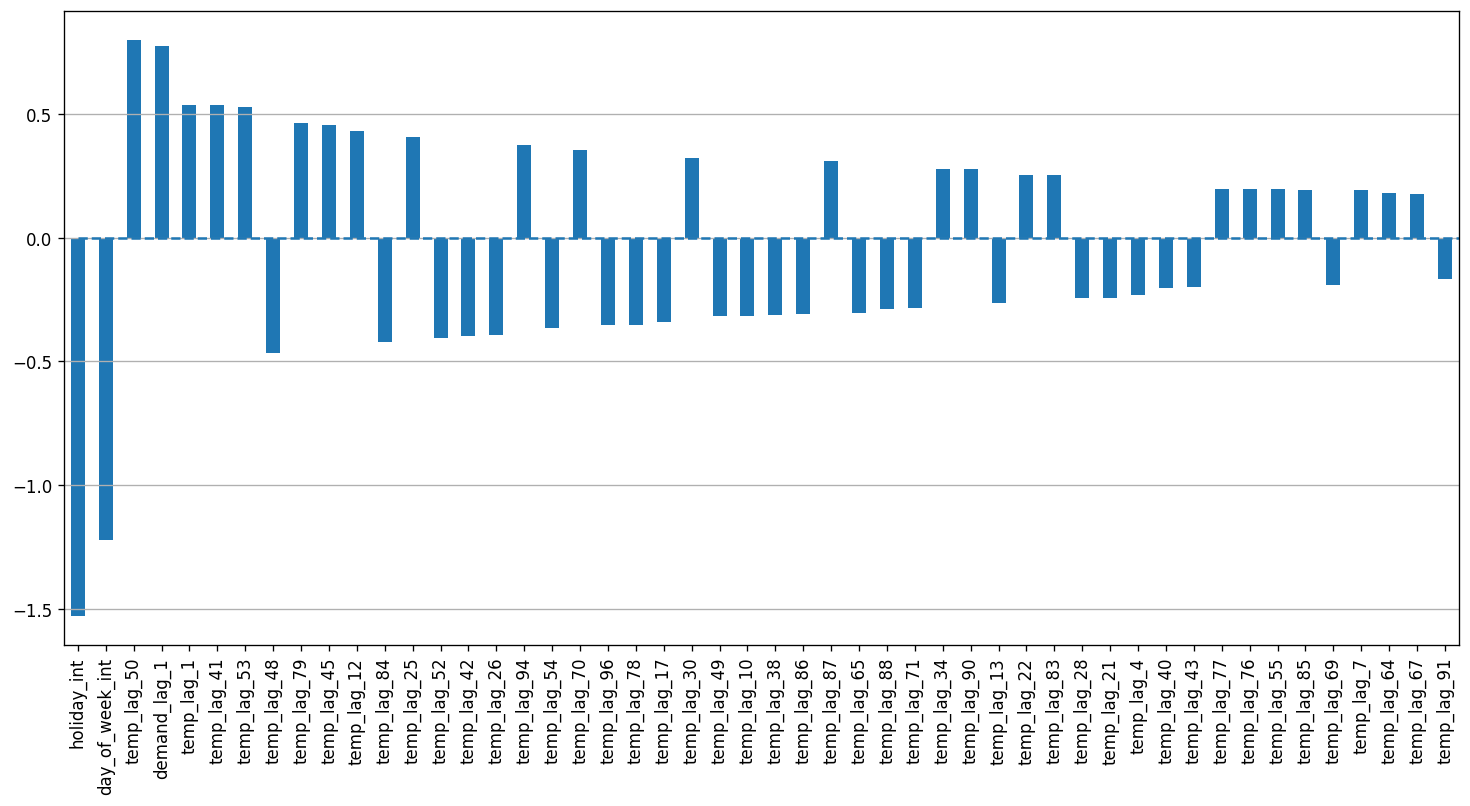

In [113]:
def plotCoefficients(model, maxDisplayValues=50):
    
    coefs = pd.DataFrame(model.coef_, X_train.columns)
    coefs.columns = ["coef"]
    coefs["abs"] = coefs.coef.apply(np.abs)
    coefs = coefs.sort_values(by="abs", ascending=False).drop(["abs"], axis=1)
    plot_coefs = coefs.head(maxDisplayValues)
    
    plt.figure(figsize=(15, 7))
    plot_coefs.coef.plot(kind='bar')
    plt.grid(True, axis='y')
    plt.hlines(y=0, xmin=0, xmax=len(plot_coefs), linestyles='dashed');

plotCoefficients(lr)

In [114]:
import joblib
joblib.dump(lr, "./linear_model_15m.joblib")

['./linear_model_15m.joblib']